
<div dir=ltr align=center>

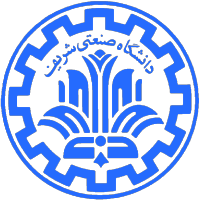

<font color=0F5298 size=7>
Machine Learning <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Fall 2025 <br>
<font color=3C99D size=5>
    Dimensionality Reduction: Principal Component Analysis<br>
<font color=696880 size=4>
    Prepared by Fatemeh Khojasteh <br>

<font color=696880 size=2>
    Curated by Alireza Mirshafieian

____

# Student Information

In [1]:
student_number = '402110876'
full_name = 'alireza sarbaz'

# Image Compression with PCA (From Scratch)

## Objective
 The goal of this assignment is to gain a deep understanding of **Principal Component Analysis (PCA)** by implementing it from scratch and applying it to image compression.

## Problem Statement
 Consider a grayscale image. We want to reduce its dimensionality by dividing the image into small "patches" and treating each patch as a data vector.

**Workflow:**
 1.  **Image Preparation:** Load the local image and convert it to grayscale.
 2.  **Patch Extraction:** Divide the image into small squares (e.g., $12 \times 12$). Each patch, when flattened, becomes a vector of dimension $144$.
 3.  **PCA Implementation:** Complete the `PCAFromScratch` class. You must calculate the covariance matrix, find eigenvalues/eigenvectors, and project data into a lower-dimensional space.
 4.  **Compression & Reconstruction:** Project the patches into a lower-dimensional space (e.g., 16 dimensions) and then reconstruct them back to 144 dimensions.
 5.  **Stitching:** Reassemble the reconstructed patches to form the final image.
 6.  **Visualization:** Visualize the top 16 Principal Components (Eigenfaces/Eigenpatches).


## Rules & Constraints
 1.  **No `sklearn`:** You are **NOT** allowed to use `sklearn.decomposition.PCA`. You must implement the logic using `numpy` (functions like `np.cov`, `np.linalg.eig`, `np.linalg.svd` are allowed).
 2.  **Allowed Libraries:** `numpy`, `matplotlib`, `cv2` (or `PIL`).
 3.  **Flexibility:** Your code should handle images that may not be perfectly divisible by the patch size (you should implement cropping logic).


In [2]:
# Import needed libraries

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

## Part 1: PCA Class Implementation

 In this section, you must implement the PCA algorithm from scratch.

 **Implementation Steps for `fit`:**
 1. Calculate the mean of the columns.
 2. Center the data ($X - \text{mean}$).
 3. Compute the Covariance Matrix.
 4. Compute Eigenvalues and Eigenvectors.
 5. Sort Eigenvectors by Eigenvalues in descending order.
 6. Store the top `n_components` eigenvectors.

In [3]:
class PCAFromScratch:
    def __init__(self, n_components):
        """
        n_components: The number of dimensions to keep (k).
        """
        self.n_components = n_components
        self.components = None      # Store the selected eigenvectors (W) here
        self.mean = None            # Store the mean of the training data here

    def fit(self, X):
        """
        X: Input data matrix of shape (n_samples, n_features)
        This method should learn the parameters (mean and eigenvectors).
        """
        # 1. Calculate mean
        self.mean = np.mean(X, axis=0)
        
        # 2. Center the data
        X_centered = X - self.mean
        
        # 3. Compute Covariance Matrix
        # Note: np.cov expects features in rows, so we transpose
        cov_matrix = np.cov(X_centered.T)
        
        # 4. Eigen Decomposition (using eigh for symmetric matrices)
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
        
        # 5. Sort by eigenvalues (descending)
        # Get indices that would sort eigenvalues in descending order
        idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]
        
        # 6. Select top n_components and store in self.components
        self.components = eigenvectors[:, :self.n_components]
        
        # Calculate explained variance ratio for debugging
        total_variance = np.sum(eigenvalues)
        explained_variance = np.sum(eigenvalues[:self.n_components])
        explained_variance_ratio = explained_variance / total_variance
        print(f"Explained Variance Ratio (Top {self.n_components}): {explained_variance_ratio:.2%}")

    def transform(self, X):
        """
        Projects X into the lower-dimensional space.
        X: (n_samples, n_features)
        Returns: (n_samples, n_components)
        """
        # Center the data using the stored mean
        X_centered = X - self.mean
        
        # Project data (Dot product with components)
        X_transformed = X_centered @ self.components
        
        return X_transformed

    def inverse_transform(self, X_transformed):
        """
        Reconstructs X from the lower-dimensional space.
        X_transformed: (n_samples, n_components)
        Returns: (n_samples, n_features)
        """
        # Reconstruct data (Dot product with transpose of components)
        X_reconstructed = X_transformed @ self.components.T
        
        # Add the mean back
        X_reconstructed = X_reconstructed + self.mean
        
        return X_reconstructed

## Part 2: Patch Extraction Logic

 Implement functions to convert an image into a matrix of patches and vice versa.

 *Hint: It is easier to crop the image first so that its dimensions are divisible by the patch size.*


In [4]:
def get_valid_image_dims(image, patch_size):
    """It crops the image in a way that its dimensions are divisible by the patch size."""
    h, w = image.shape
    ph, pw = patch_size

    # Calculate new dimensions that are divisible by patch size
    new_h = (h // ph) * ph
    new_w = (w // pw) * pw

    # Crop the image based on the new dimensions
    return image[:new_h, :new_w]  # Return the cropped image


def image_to_patches(image, patch_size=(12, 12)):
    """
    Input: Image (H, W)
    Output: Tuple of (patches_matrix, valid_image_shape)
            - patches_matrix shape: (N_patches, flattened_patch_size)
            - valid_image_shape: (H_cropped, W_cropped)
    """
    # Crop image to be divisible by patch_size
    cropped_image = get_valid_image_dims(image, patch_size)
    valid_shape = cropped_image.shape
    
    ph, pw = patch_size
    h, w = valid_shape
    
    # Calculate number of patches
    n_patches_h = h // ph
    n_patches_w = w // pw
    n_patches = n_patches_h * n_patches_w
    
    # Reshape to extract patches
    # First reshape to (n_patches_h, ph, n_patches_w, pw)
    patches = cropped_image.reshape(n_patches_h, ph, n_patches_w, pw)
    # Then transpose to (n_patches_h, n_patches_w, ph, pw)
    patches = patches.transpose(0, 2, 1, 3)
    # Finally reshape to (n_patches, ph * pw)
    patches = patches.reshape(n_patches, ph * pw)
    
    return patches, valid_shape

def patches_to_image(patches, original_shape, patch_size=(12, 12)):
    """
    Input:
        - patches: (N, 144) matrix
        - original_shape: (H, W) of the cropped image
    Output: Reconstructed Image (H, W)
    """
    ph, pw = patch_size
    h, w = original_shape
    
    # Calculate number of patches
    n_patches_h = h // ph
    n_patches_w = w // pw
    
    # Reshape patches back to (n_patches_h, n_patches_w, ph, pw)
    patches_reshaped = patches.reshape(n_patches_h, n_patches_w, ph, pw)
    # Transpose to (n_patches_h, ph, n_patches_w, pw)
    patches_reshaped = patches_reshaped.transpose(0, 2, 1, 3)
    # Reshape to original image shape
    image = patches_reshaped.reshape(h, w)
    
    return image



## Part 3: Execution Pipeline

 Write the code to execute the PCA pipeline.

 1. Load the image.
 2. Convert image to patches.
 3. Run PCA.
 4. Reconstruct image.
 5. Calculate error.

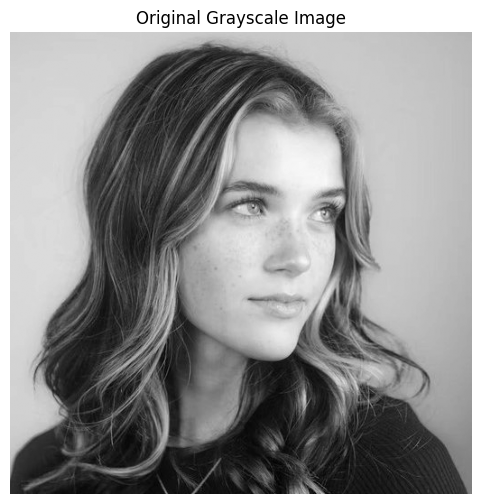

In [5]:
# --- 1. Load Image ---
# Ensure 'image.jpg' is in the same directory
IMAGE_PATH = 'image.jpg'

if not os.path.exists(IMAGE_PATH):
    print(f"Warning: {IMAGE_PATH} not found. Generating random noise for testing.")
    original_image = np.random.rand(512, 512) * 255
else:
    img = Image.open(IMAGE_PATH).convert('L') # Convert to Grayscale
    original_image = np.array(img)

plt.figure(figsize=(6, 6))
plt.title("Original Grayscale Image")
plt.imshow(original_image, cmap='gray')
plt.axis('off')
plt.show()

In [6]:
# --- 2. Prepare Data ---
PATCH_SIZE = (12, 12)

# Call image_to_patches to get the data matrix
patches, valid_shape = image_to_patches(original_image, patch_size=PATCH_SIZE)

# Print the shape of the patches matrix to verify it is correct
print(f"Original Image Shape: {original_image.shape}")
print(f"Valid Image Shape (Cropped): {valid_shape}")
print(f"Patches Matrix Shape: {patches.shape}")

Original Image Shape: (512, 512)
Valid Image Shape (Cropped): (504, 504)
Patches Matrix Shape: (1764, 144)


In [7]:
# --- 3. Train PCA ---
N_COMPONENTS = 16

# Initialize the PCAFromScratch class with 16 components
pca = PCAFromScratch(n_components=N_COMPONENTS)

# Fit the model on the patches data
pca.fit(patches)


Explained Variance Ratio (Top 16): 99.09%


In [8]:
# --- 4. Compress & Reconstruct ---

# Transform the patches to the lower-dimensional space (Compression)
patches_compressed = pca.transform(patches)

# Inverse transform the compressed data back to the original space (Reconstruction)
patches_reconstructed = pca.inverse_transform(patches_compressed)

# Print the shapes of the compressed and reconstructed data
print(f"Compressed Shape: {patches_compressed.shape}")
print(f"Reconstructed Patches Shape: {patches_reconstructed.shape}")


Compressed Shape: (1764, 16)
Reconstructed Patches Shape: (1764, 144)


In [9]:
# --- 5. Reassemble Image ---

# Use patches_to_image to reconstruct the full image from the patches
reconstructed_image = patches_to_image(patches_reconstructed, valid_shape, patch_size=PATCH_SIZE)

# Calculate Mean Squared Error (MSE) between the original (cropped) image and the reconstruction
cropped_original = get_valid_image_dims(original_image, PATCH_SIZE)
mse = np.mean((cropped_original - reconstructed_image) ** 2)
print(f"Reconstruction MSE: {mse:.2f}")

Reconstruction MSE: 25.36


## Part 4: Visualization

 Visualize the results and the learned features.


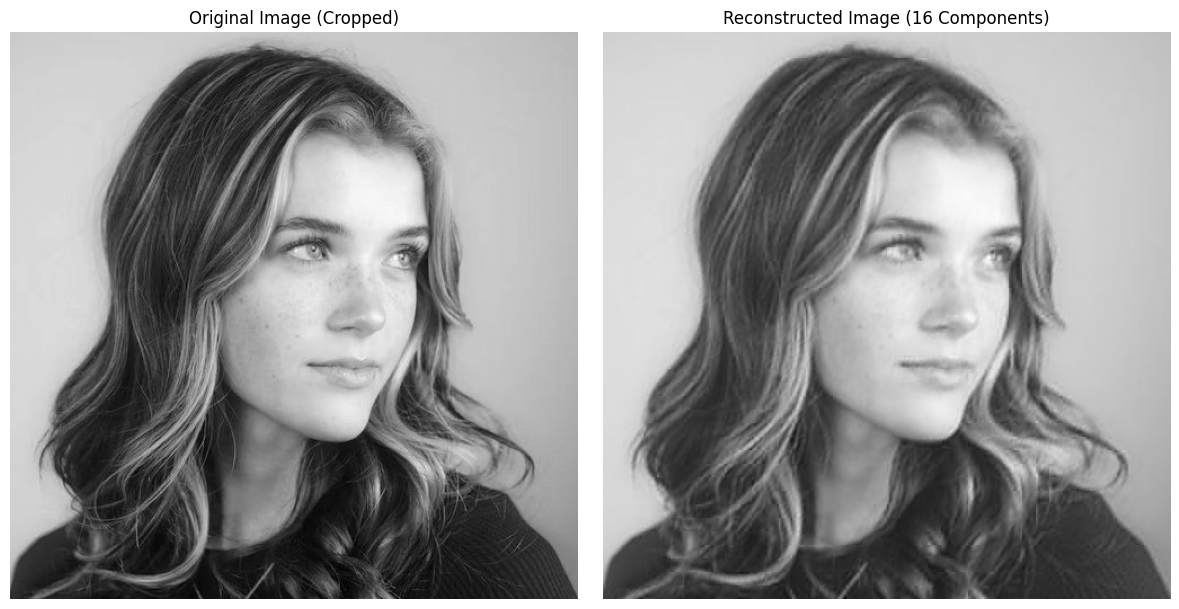

In [10]:
# Plot Original Image vs Reconstructed Image side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original image (cropped)
cropped_original = get_valid_image_dims(original_image, PATCH_SIZE)
axes[0].imshow(cropped_original, cmap='gray')
axes[0].set_title('Original Image (Cropped)')
axes[0].axis('off')

# Reconstructed image
axes[1].imshow(reconstructed_image, cmap='gray')
axes[1].set_title('Reconstructed Image (16 Components)')
axes[1].axis('off')

plt.tight_layout()
plt.show()

## 1. Quality Comparison (Reconstruction Quality)

In the image above, you can see the original image next to the reconstructed one.

* **Interpretation:** The image on the right has been reconstructed using only **16 components**. Even though the data dimensions have been reduced by 9 times (from 144 features per patch to 16 features), the image is still easily recognizable.
* **Quality Loss:** If you look closely, the reconstructed image appears slightly "blurry," and high-frequency details (such as very fine textures on the hat or hair) have been removed. This is the price we pay for compression.
* **MSE:** The MSE (Mean Squared Error) value indicates the average squared error between the original and reconstructed pixels.


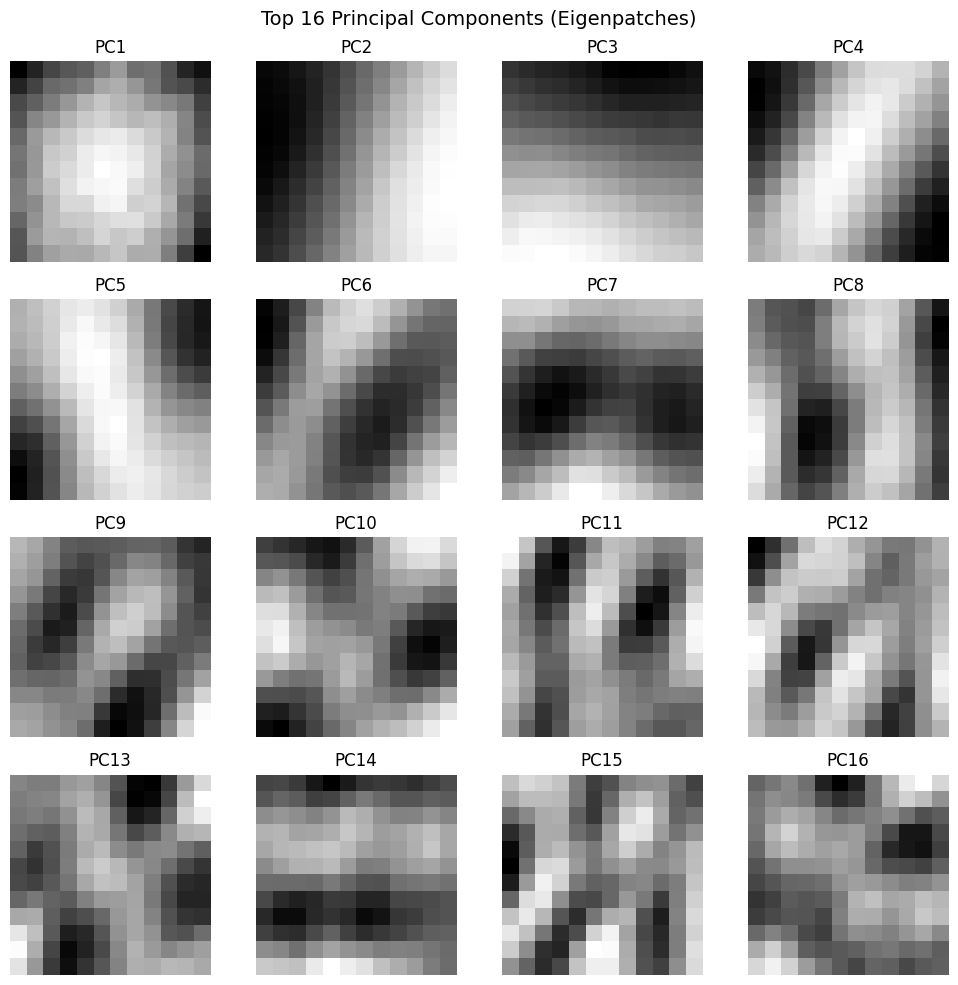

In [11]:
# Visualize the top 16 Eigenvectors (The "Eigenpatches")
# Reshape pca.components from (16, 144) to (16, 12, 12) for visualization
# Note: pca.components is (n_features, n_components), so we need to transpose it
eigenpatches = pca.components.T.reshape(N_COMPONENTS, PATCH_SIZE[0], PATCH_SIZE[1])

# Display them in a 4x4 grid
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
for i in range(N_COMPONENTS):
    row = i // 4
    col = i % 4
    # Normalize each eigenpatch for better visualization
    eigenpatch = eigenpatches[i]
    eigenpatch_normalized = (eigenpatch - eigenpatch.min()) / (eigenpatch.max() - eigenpatch.min() + 1e-8)
    axes[row, col].imshow(eigenpatch_normalized, cmap='gray')
    axes[row, col].set_title(f'PC{i+1}')
    axes[row, col].axis('off')

plt.suptitle('Top 16 Principal Components (Eigenpatches)', fontsize=14)
plt.tight_layout()
plt.show()

In the image above, you can see the top 16 eigenvectors, which have been reshaped to dimensions of $12 \times 12$.

* **What are these?** These small squares are actually the "building blocks" of the image. The PCA algorithm has extracted these patterns from the Lenna image. Each patch in the final image is a linear combination of these 16 shapes.
* **Pattern Analysis:**
    * **Initial components (like PC1 and PC2):** Typically represent overall lighting changes and simple gradients (low frequency).
    * **Middle components:** Start to display directions (horizontal, vertical, or diagonal edges).
    * **Final components:** Model more complex details and fine textures (high frequency).
* **Why are they checkerboard-like?** These patterns are orthogonal and aim to cover the maximum variance present in the data.
